# Data Import and Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df=pd.read_csv('/content/ner_dataset.csv', encoding= 'unicode_escape')

In [3]:
print(df.shape)
df.head()

(1048575, 4)


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [4]:
df.fillna(method = 'ffill', inplace = True)
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [5]:
df.info() #There seems to be no null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Sentence #  1048575 non-null  object
 1   Word        1048575 non-null  object
 2   POS         1048575 non-null  object
 3   Tag         1048575 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [6]:
df.rename(columns = {'Sentence #':'Sentence'}, inplace = True)
df.columns

Index(['Sentence', 'Word', 'POS', 'Tag'], dtype='object')

In [7]:
df['Sentence'] = df['Sentence'].apply(lambda x:x.split()[-1]).astype(int)

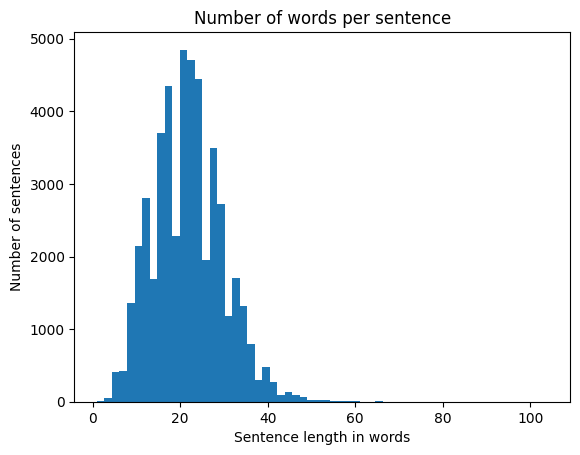

In [8]:
sentence_len = df['Sentence'].value_counts().tolist()
plt.hist(sentence_len, bins=60)
plt.title('Number of words per sentence')
plt.xlabel('Sentence length in words')
plt.ylabel('Number of sentences')
plt.show()

In [9]:
temp = pd.Series(sentence_len)
summary_stats = temp.describe()
print(summary_stats)

count    47959.000000
mean        21.863988
std          7.963680
min          1.000000
25%         16.000000
50%         21.000000
75%         27.000000
max        104.000000
dtype: float64


In [10]:
entities = df.groupby("Tag")['Word']
entities.describe()

,count,unique,top,freq
Tag,,,,
B-art,402,280,English,12
B-eve,308,102,II,70
B-geo,37644,3045,U.S.,3169
B-gpe,15870,455,Iraqi,1137
B-nat,201,39,Katrina,47
B-org,20143,3012,U.S.,847
B-per,16990,3029,Mr.,3085
B-tim,20333,1094,Tuesday,1363
I-art,297,227,of,6


- **B-art**: Beginning of an artifact - Manmade objects, structures, or abstract entities.
- **B-eve**: Beginning of an event - Incidents or occasions occurring during a specific time.
- **B-geo**: Beginning of a geographical entity - Geographical locations, areas, or landmasses.
- **B-gpe**: Beginning of a geopolitical entity - Political or socially defined regions, including nations and governments.
- **B-nat**: Beginning of a natural object - Naturally occurring entities such as diseases or biological entities.
- **B-org**: Beginning of an organization - Corporations, agencies, or groups with established organizational structures.
- **B-per**: Beginning of a person - Individuals with human characteristics, including divine entities.
- **B-tim**: Beginning of a time entity - Temporal entities with specific names, such as days of the week or months.
- **I-art**: Not beginning of an artifact.
- **I-eve**: Not beginning of an event.
- **I-geo**: Not beginning of a geographical entity.
- **I-gpe**: Not beginning of a geopolitical entity.
- **I-nat**: Not beginning of a natural object.
- **I-org**: Not beginning of an organization.
- **I-per**: Not beginning of a person.
- **I-tim**: Not beginning of a time entity.
- **O**: Outside any named entity category.


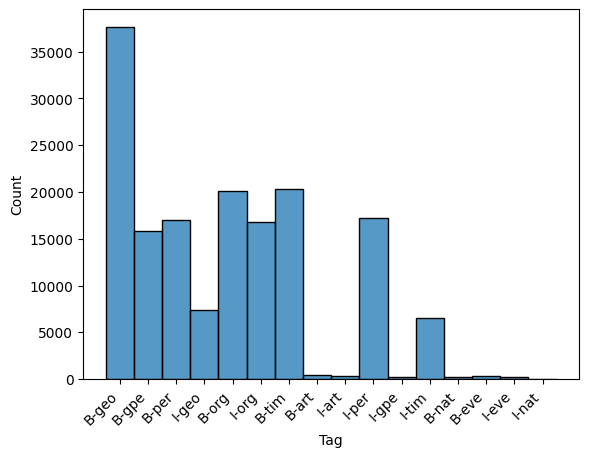

In [11]:
import seaborn as sns
sns.histplot(df[df['Tag']!='O']['Tag'])
plt.xticks(rotation=45, ha='right')
plt.show()

In [12]:
postags = df.groupby("POS")['Word']
postags.describe()

,count,unique,top,freq
POS,,,,
$,1149,2,$,1138
",",32757,3,",",32753
.,47831,4,.,47761
:,795,7,-,657
;,214,2,;,206
CC,23716,18,and,19936
CD,24695,1622,two,2614
DT,98454,56,the,52572
EX,663,2,there,432


- **CC**: Coordinating conjunction
- **CD**: Cardinal number
- **DT**: Determiner
- **EX**: Existential there
- **FW**: Foreign word
- **IN**: Preposition or subordinating conjunction
- **JJ**: Adjective
- **JJR**: Adjective, comparative
- **JJS**: Adjective, superlative
- **LRB**: Left parenthesis
- **MD**: Modal
- **NN**: Noun, singular or mass
- **NNP**: Proper noun, singular
- **NNPS**: Proper noun, plural
- **NNS**: Noun, plural
- **PDT**: Predeterminer
- **POS**: Possessive ending
- **PRP**: Personal pronoun
- **PRP\$**: Possessive pronoun
- **RB**: Adverb
- **RBR**: Adverb, comparative
- **RBS**: Adverb, superlative
- **RP**: Particle
- **RRB**: Right parenthesis
- **TO**: to
- **UH**: Interjection
- **VB**: Verb, base form
- **VBD**: Verb, past tense
- **VBG**: Verb, gerund or present participle
- **VBN**: Verb, past participle
- **VBP**: Verb, non-3rd person singular present
- **VBZ**: Verb, 3rd person singular present
- **WDT**: Wh-determiner
- **WP**: Wh-pronoun
- **WP$**: Possessive wh-pronoun
- **WRB**: Wh-adverb


In [13]:
df['Label'] = df['Tag'].apply(lambda x:x.split('-')[-1])
df['Label'].unique()

array(['O', 'geo', 'gpe', 'per', 'org', 'tim', 'art', 'nat', 'eve'],
      dtype=object)

In [14]:
#!pip install wordcloud

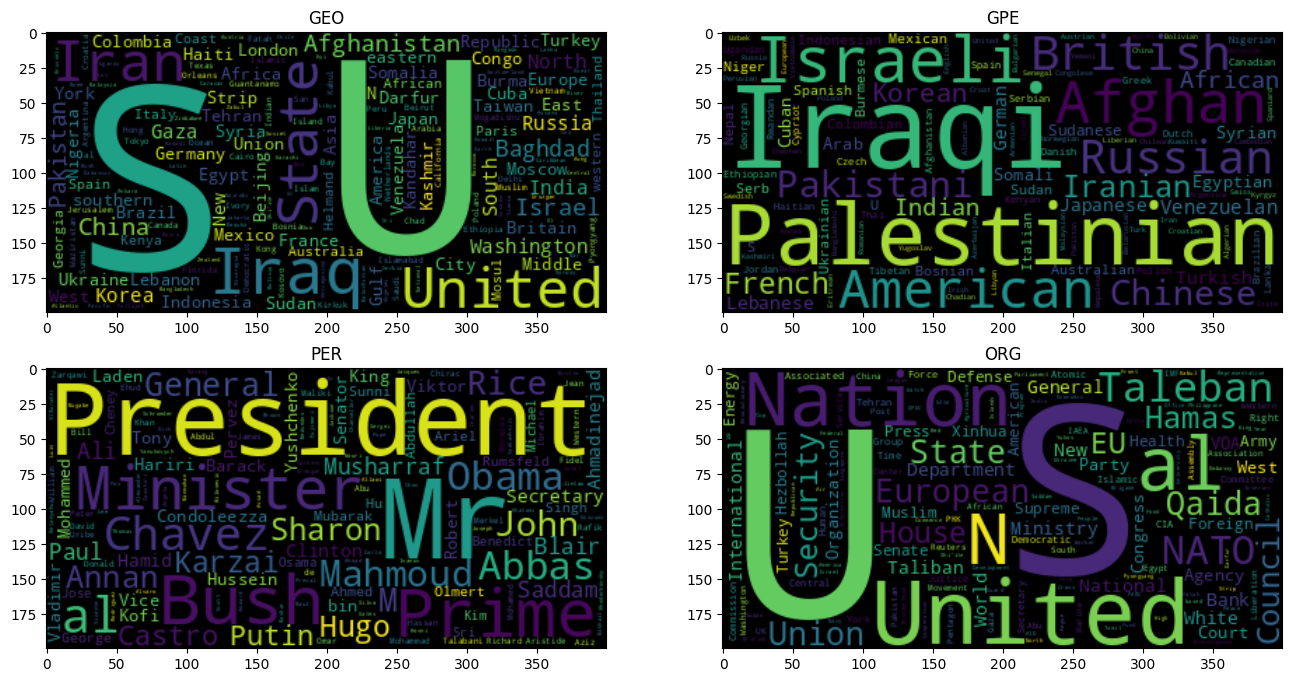

In [15]:
from wordcloud import WordCloud #STOPWORDS, ImageColorGenerator
i = 0
plt.figure(figsize=(16,8))
for label in ['geo', 'gpe', 'per', 'org']:
    label_df = df[df['Label'] == label]
    label_texts = ' '.join(label_df['Word'].tolist())
    label_wc = WordCloud(collocations = False).generate(label_texts)
    plt.subplot(2, 2, i + 1)
    plt.imshow(label_wc, interpolation='bilinear')
    plt.title("{}".format(label).upper())
    i += 1

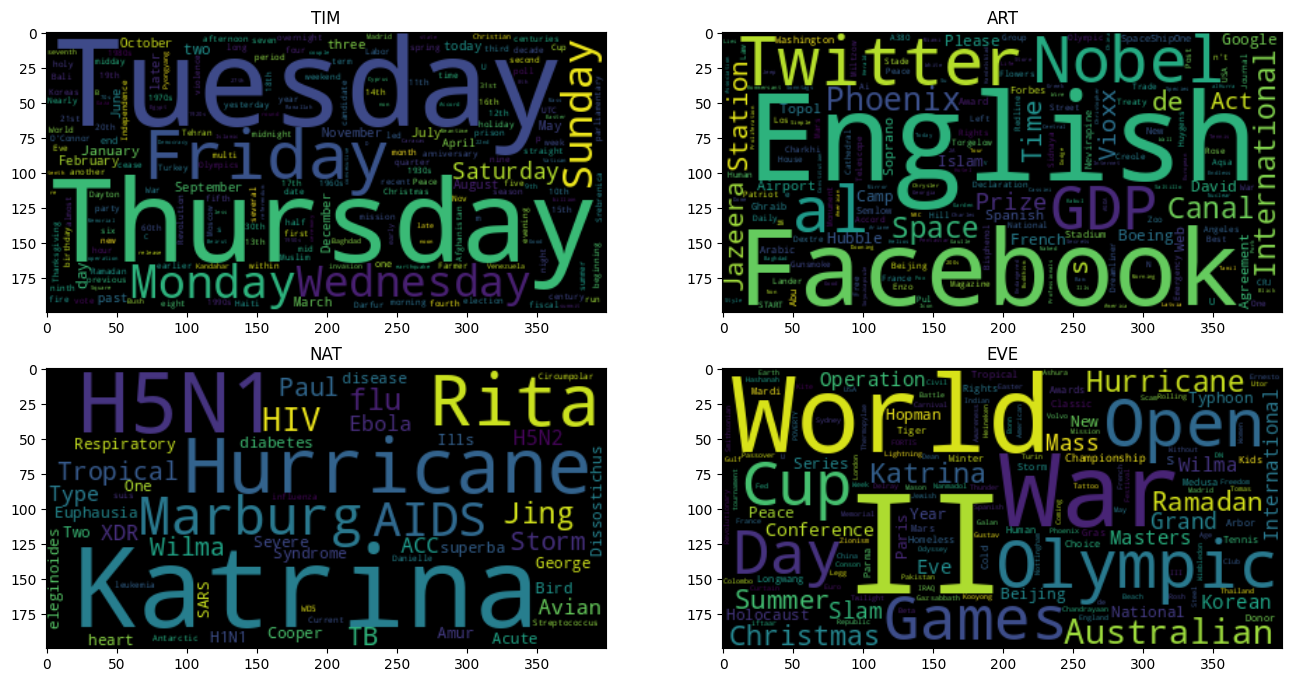

In [16]:
i = 0
plt.figure(figsize=(16,8))
for label in ['tim', 'art', 'nat', 'eve']:
    label_df = df[df['Label'] == label]
    label_texts = ' '.join(label_df['Word'].tolist())
    label_wc = WordCloud(collocations = False).generate(label_texts)
    plt.subplot(2, 2, i + 1)
    plt.imshow(label_wc, interpolation='bilinear')
    plt.title("{}".format(label).upper())
    i += 1

In [17]:
df = df.drop('Label', axis=1)

In [18]:
df[df['Sentence']==1]

,Sentence,Word,POS,Tag
0,1,Thousands,NNS,O
1,1,of,IN,O
2,1,demonstrators,NNS,O
3,1,have,VBP,O
4,1,marched,VBN,O
5,1,through,IN,O
6,1,London,NNP,B-geo
7,1,to,TO,O
8,1,protest,VB,O
9,1,the,DT,O


In [19]:
print('Number of sentences are '+str(df['Sentence'].nunique()))
print('Number of Vocabs are '+str(df['Word'].nunique()))

Number of sentences are 47959
Number of Vocabs are 35178
